## Heart Attack Analysis & Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
heart = pd.read_csv('./Dataset/heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart.shape

(303, 14)

In [7]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


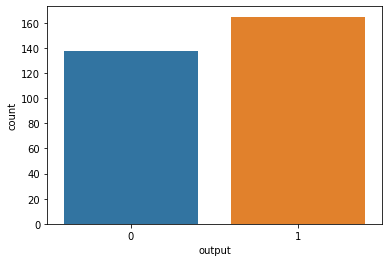

In [9]:
sns.countplot(heart['output'])

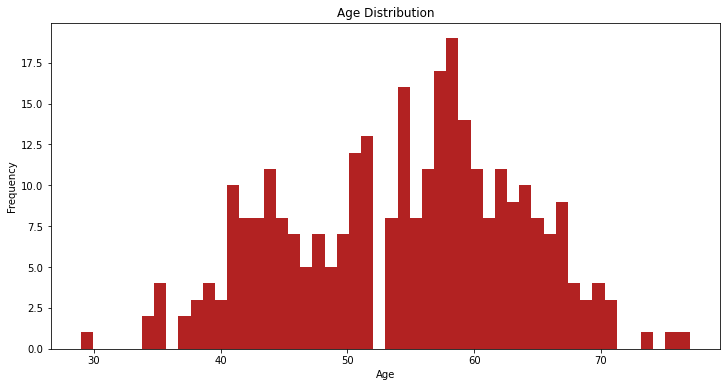

In [10]:
## Age Distribution
plt.figure(figsize = (12,6))
plt.hist(heart["age"], bins = 50, color = "firebrick")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution", size = 12)
plt.show()

In [11]:
x = heart.iloc[:, :-1]
y = heart.iloc[:, -1]

In [12]:
## Train Test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

## Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_clf_model = DecisionTreeClassifier()
dt_clf_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

dt_y_pred = dt_clf_model.predict(x_test)

print('Accuracy Score: \n', accuracy_score(y_test, dt_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, dt_y_pred))
print('Classification Report: \n', classification_report(y_test, dt_y_pred))

Accuracy Score: 
 0.7868852459016393
Confusion Matrix: 
 [[23 10]
 [ 3 25]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        33
           1       0.71      0.89      0.79        28

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.81      0.79      0.79        61



## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_model = RandomForestClassifier(n_jobs=-1)
rf_clf_model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [16]:
rf_y_pred = rf_clf_model.predict(x_test)

print('Accuracy Score: \n', accuracy_score(y_test, rf_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report: \n', classification_report(y_test, rf_y_pred))

Accuracy Score: 
 0.8688524590163934
Confusion Matrix: 
 [[26  7]
 [ 1 27]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



## Ada Boosting

In [17]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf_model = AdaBoostClassifier(random_state=100)
ada_clf_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=100)

In [18]:
ada_y_pred = ada_clf_model.predict(x_test)

print('Accuracy Score: \n', accuracy_score(y_test, ada_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, ada_y_pred))
print('Classification Report: \n', classification_report(y_test, ada_y_pred))

Accuracy Score: 
 0.819672131147541
Confusion Matrix: 
 [[24  9]
 [ 2 26]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.74      0.93      0.83        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.84      0.82      0.82        61



## Ada Boost With Random Forest

In [19]:
ada_rf_model = AdaBoostClassifier(base_estimator=rf_clf_model)
ada_rf_model.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_jobs=-1))

In [20]:
ada_rf_y_pred = ada_rf_model.predict(x_test)

print('Accuracy Score: \n', accuracy_score(y_test, ada_rf_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, ada_rf_y_pred))
print('Classification Report: \n', classification_report(y_test, ada_rf_y_pred))

Accuracy Score: 
 0.819672131147541
Confusion Matrix: 
 [[26  7]
 [ 4 24]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.86      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



## Randomized Search CV

In [21]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(200, 2000, 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7, 10, 14]
# Minimum number samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create a random grid
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'criterion': ['entropy', 'gini']

}
print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 5, 7, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [22]:
rf = RandomForestClassifier(n_jobs=-1)
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=100, n_jobs=-1)
rf_randomcv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 7, 10, 14],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=100, verbose=2)

In [23]:
rf_randomcv.best_params_

{'n_estimators': 650,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'criterion': 'gini'}

In [24]:
rf_randomcv_model = rf_randomcv.best_estimator_
rf_randomcv_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=650, n_jobs=-1)

In [25]:
rf_randomcv_model_y_pred = rf_randomcv_model.predict(x_test)

print('Accuracy Score: \n', accuracy_score(y_test, rf_randomcv_model_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, rf_randomcv_model_y_pred))
print('Classification Report: \n', classification_report(y_test, rf_randomcv_model_y_pred))

Accuracy Score: 
 0.8688524590163934
Confusion Matrix: 
 [[26  7]
 [ 1 27]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



## Gridsearch CV

In [26]:
rf_randomcv.best_params_

{'n_estimators': 650,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'criterion': 'gini'}

In [27]:
# Create a param grid
param_grid = {'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100, rf_randomcv.best_params_['n_estimators'],                                             rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200],
                'max_features': [rf_randomcv.best_params_['max_features']],
                'max_depth': [rf_randomcv.best_params_['max_depth']],
                'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] -2, rf_randomcv.best_params_['min_samples_split']-1, rf_randomcv.best_params_['min_samples_split'], rf_randomcv.best_params_['min_samples_split'] +1, rf_randomcv.best_params_['min_samples_split'] +2,],
                'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], rf_randomcv.best_params_['min_samples_leaf']+2,                                          rf_randomcv.best_params_['min_samples_leaf'] + 4],
                'criterion': [rf_randomcv.best_params_['criterion']]

}
print(param_grid)

{'n_estimators': [550, 650, 750, 850], 'max_features': ['auto'], 'max_depth': [80], 'min_samples_split': [3, 4, 5, 6, 7], 'min_samples_leaf': [4, 6, 8], 'criterion': ['gini']}


In [28]:
from sklearn.model_selection import GridSearchCV

rf2 = RandomForestClassifier(n_jobs=-1)
rf_gridcv = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
rf_gridcv.fit(x_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   46.9s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [80],
                         'max_features': ['auto'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [550, 650, 750, 850]},
             verbose=2)

In [29]:
rf_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 650}

In [30]:
rf_gridcv_model = rf_gridcv.best_estimator_
rf_gridcv_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=650, n_jobs=-1)

In [31]:
rf_gridcv_y_pred = rf_gridcv_model.predict(x_test)

print('Accuracy Score: \n', accuracy_score(y_test, rf_gridcv_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, rf_gridcv_y_pred))
print('Classification Report: \n', classification_report(y_test, rf_gridcv_y_pred))

Accuracy Score: 
 0.8688524590163934
Confusion Matrix: 
 [[26  7]
 [ 1 27]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



## SVM Classifier

In [32]:
from sklearn import svm

svm_clf_model = svm.SVC(kernel='linear')
svm_clf_model.fit(x_train, y_train)

SVC(kernel='linear')

In [33]:
svm_y_pred = svm_clf_model.predict(x_test)

print('Accuracy Score: \n', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report: \n', classification_report(y_test, svm_y_pred))

Accuracy Score: 
 0.7868852459016393
Confusion Matrix: 
 [[24  9]
 [ 4 24]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.73      0.86      0.79        28

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



## SVM Hyper parameter tunning

In [34]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, 
                {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

svc_grid_search = GridSearchCV(estimator=svm_clf_model, param_grid=parameters, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
svc_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   27.5s finished


GridSearchCV(cv=3, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [35]:
svc_grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [36]:
svc_grid_search_model = svc_grid_search.best_estimator_
svc_grid_search_model.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [37]:
svc_grid_search_y_pred = svc_grid_search_model.predict(x_test)

print('Accuracy Score: \n', accuracy_score(y_test, svc_grid_search_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, svc_grid_search_y_pred))
print('Classification Report: \n', classification_report(y_test, svc_grid_search_y_pred))

Accuracy Score: 
 0.7868852459016393
Confusion Matrix: 
 [[24  9]
 [ 4 24]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.73      0.86      0.79        28

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

s_lr_model = LogisticRegression()
s_lr_model.fit(x_train, y_train)

LogisticRegression()

In [40]:
s_lr_y_pred = s_lr_model.predict(x_test)

print('Accuracy Score:', accuracy_score(y_test, s_lr_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, s_lr_y_pred))
print('Classification Report: \n', classification_report(y_test, s_lr_y_pred))

Accuracy Score: 0.8524590163934426
Confusion Matrix: 
 [[25  8]
 [ 1 27]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.76      0.85        33
           1       0.77      0.96      0.86        28

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



## KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

s_knn_clf = KNeighborsClassifier(weights='distance', n_jobs=-1)
s_knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [42]:
s_knn_y_pred = s_knn_clf.predict(x_test)

print('Accuracy Score: \n', accuracy_score(y_test, s_knn_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, s_knn_y_pred))
print('Classification Report: \n', classification_report(y_test, s_knn_y_pred))

Accuracy Score: 
 0.8524590163934426
Confusion Matrix: 
 [[26  7]
 [ 2 26]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



## Ada Boost with Logistic Regression

In [43]:
scaled_ada_lr_model = AdaBoostClassifier(base_estimator=s_lr_model)
scaled_ada_lr_model.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression())

In [44]:
scaled_ada_lr_y_pred = scaled_ada_lr_model.predict(x_test)

print('Accuracy Score: \n', accuracy_score(y_test, scaled_ada_lr_y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, scaled_ada_lr_y_pred))
print('Classification Report: \n', classification_report(y_test, scaled_ada_lr_y_pred))

Accuracy Score: 
 0.8524590163934426
Confusion Matrix: 
 [[25  8]
 [ 1 27]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.76      0.85        33
           1       0.77      0.96      0.86        28

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



In [45]:
import pickle 
## open a file, where you want to store the data
## dump information to file
with open('random_forest_classifier_model.pkl', 'wb') as f:
    pickle.dump(rf_randomcv_model, f)